# Иерархическая кластеризация

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")

In [2]:
# импортируем набор данных
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
X = df.iloc[:, [5, 9, 1, 2]].values
X

array([[ 38.    ,  71.2833,   1.    ,   1.    ],
       [ 35.    ,  53.1   ,   1.    ,   1.    ],
       [ 54.    ,  51.8625,   0.    ,   1.    ],
       [  4.    ,  16.7   ,   1.    ,   3.    ],
       [ 58.    ,  26.55  ,   1.    ,   1.    ],
       [ 34.    ,  13.    ,   1.    ,   2.    ],
       [ 28.    ,  35.5   ,   1.    ,   1.    ],
       [ 19.    , 263.    ,   0.    ,   1.    ],
       [ 49.    ,  76.7292,   1.    ,   1.    ],
       [ 65.    ,  61.9792,   0.    ,   1.    ],
       [ 45.    ,  83.475 ,   0.    ,   1.    ],
       [ 29.    ,  10.5   ,   1.    ,   2.    ],
       [ 25.    ,   7.65  ,   0.    ,   3.    ],
       [ 23.    , 263.    ,   1.    ,   1.    ],
       [ 46.    ,  61.175 ,   0.    ,   1.    ],
       [ 71.    ,  34.6542,   0.    ,   1.    ],
       [ 23.    ,  63.3583,   1.    ,   1.    ],
       [ 21.    ,  77.2875,   0.    ,   1.    ],
       [ 47.    ,  52.    ,   0.    ,   1.    ],
       [ 24.    , 247.5208,   0.    ,   1.    ],
       [ 32.5   ,  1

<Axes: >

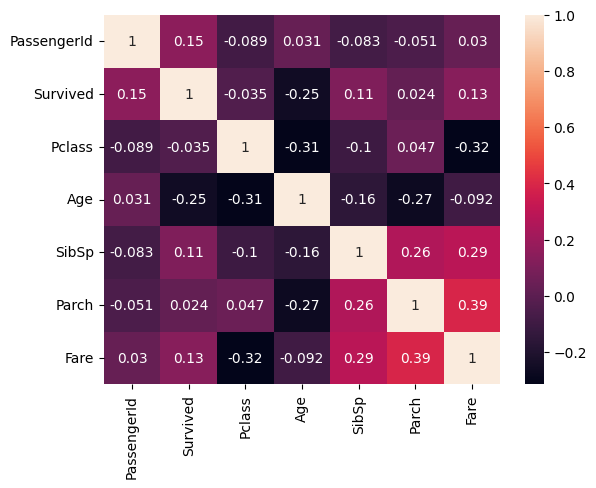

In [11]:
correl=df.corr()
sns.heatmap(correl,annot=True)

In [ ]:
# x_axis = df.SepalLengthCm.values 
# y_axis = df.SepalWidthCm.values 

# plt.xlabel(df.columns.values[1])
# plt.ylabel(df.columns.values[2])
# plt.scatter(x_axis, y_axis)
# plt.show()

In [ ]:
# import seaborn as sns

# sns.set_style("whitegrid")
# sns.pairplot(df,hue="Species",size=3);
# plt.show()

In [ ]:
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()

# plt.show()

In [ ]:
# sns.boxplot(x="Species",y="PetalLengthCm",data=df)
# plt.show()

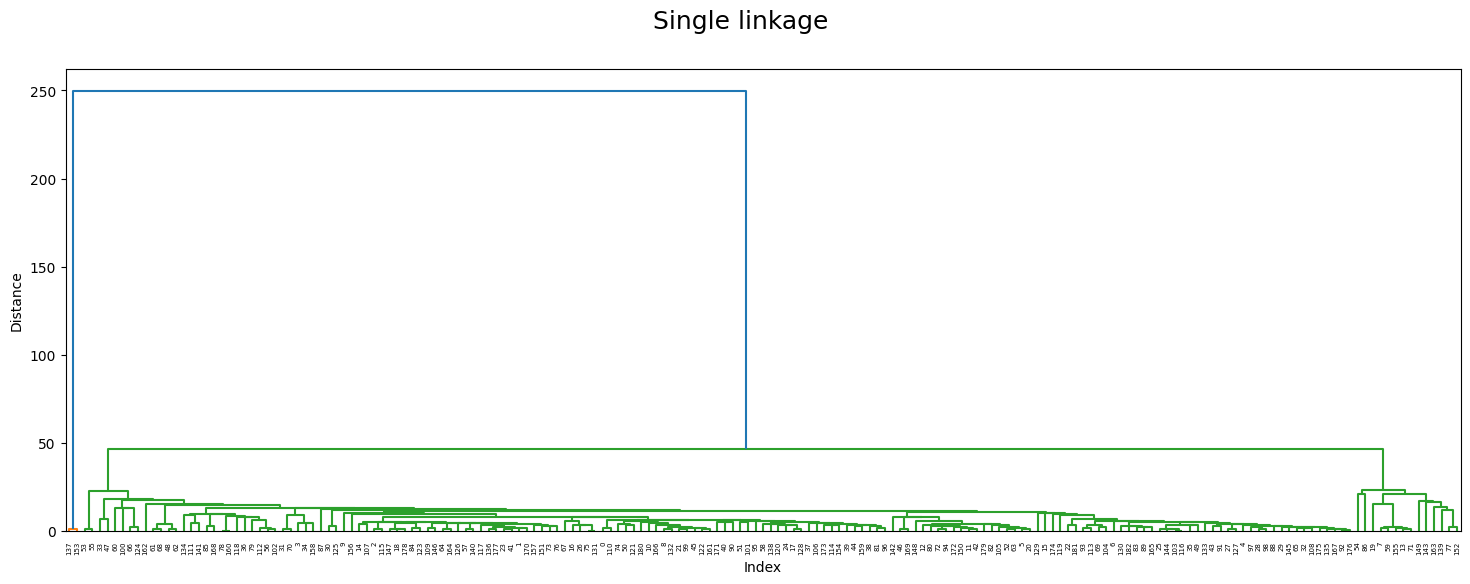

In [13]:
dist_single = linkage(df.loc[:, ["Fare",
                                 "Age",
                                 "Survived",
                                 "Pclass"]], method="single")
plt.figure(figsize=(18, 6))
dendrogram(dist_single)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Single linkage", fontsize=18)
plt.show()

In [14]:
from scipy.cluster.hierarchy import fcluster
df_SM=df.copy()

df_SM['2_clust']=fcluster(dist_single, 2, criterion='maxclust')
df_SM['3_clust']=fcluster(dist_single, 3, criterion='maxclust')
df_SM.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,2_clust,3_clust
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,2,2


<Axes: title={'center': 'Embarked'}, xlabel='Fare', ylabel='Age'>

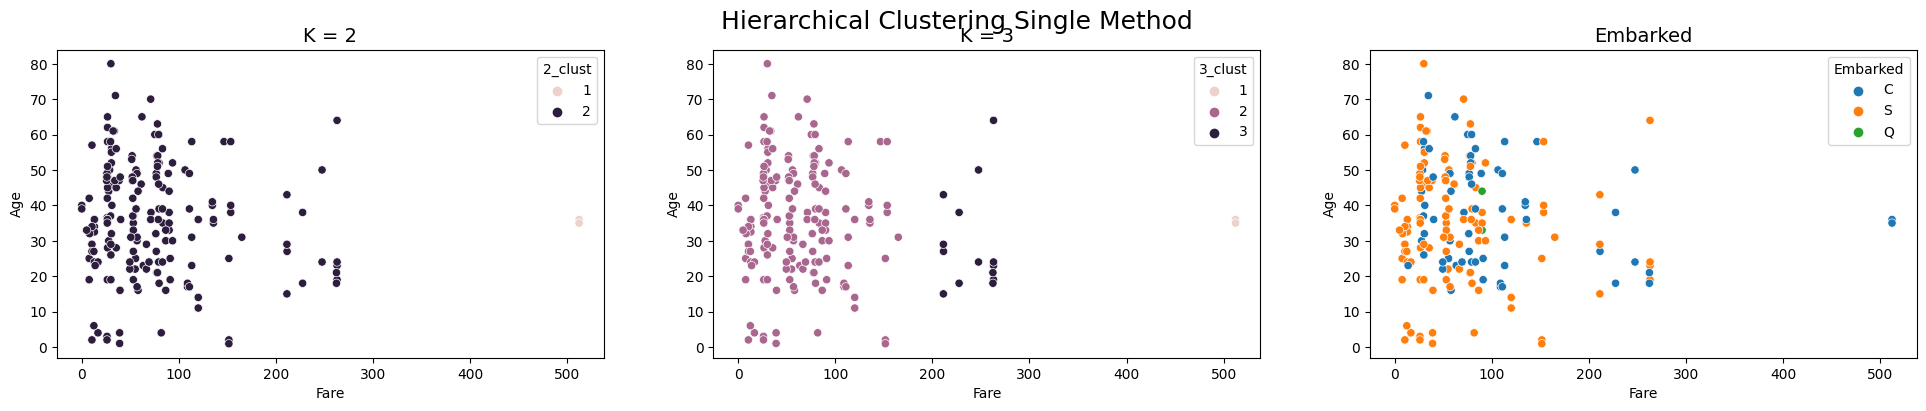

In [15]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Fare",y="Age", data=df_SM, hue="2_clust")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Fare",y="Age", data=df_SM, hue="3_clust")

plt.subplot(1,3,3)
plt.title("Embarked",fontsize=14)
sns.scatterplot(x="Fare",y="Age", data=df_SM, hue="Embarked")

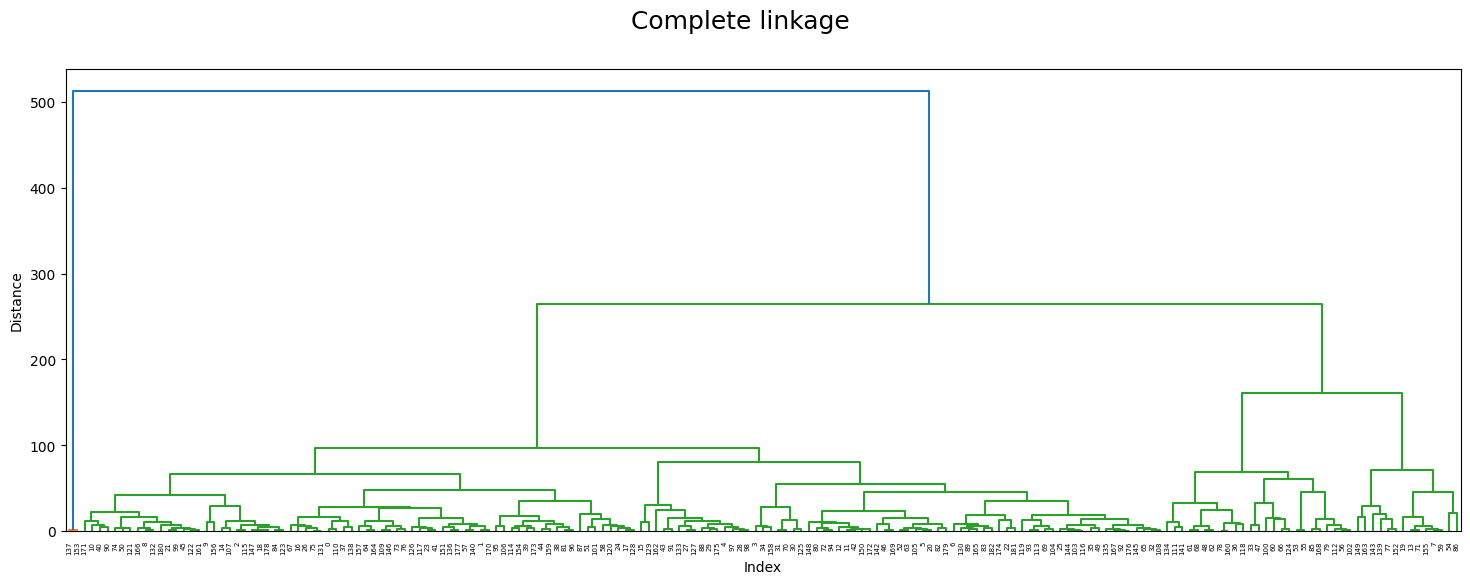

In [16]:
dist_comp = linkage(df.loc[:, ["Fare",
                                 "Age",
                                 "Survived",
                                 "Pclass"]], method="complete")
plt.figure(figsize=(18, 6))
dendrogram(dist_comp)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Complete linkage", fontsize=18)
plt.show()

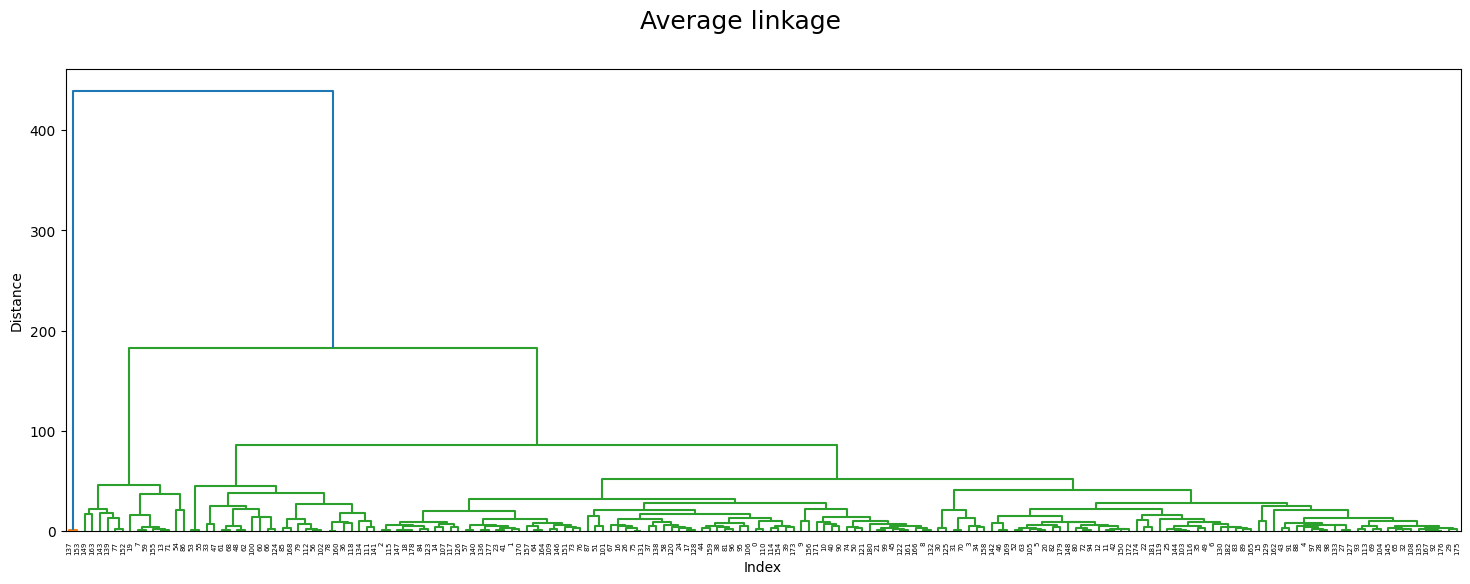

In [17]:
dist_av = linkage(df.loc[:, ["Fare",
                              "Age",
                              "Survived",
                              "Pclass"]], method="average")
plt.figure(figsize=(18, 6))
dendrogram(dist_av)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Average linkage", fontsize=18)
plt.show()

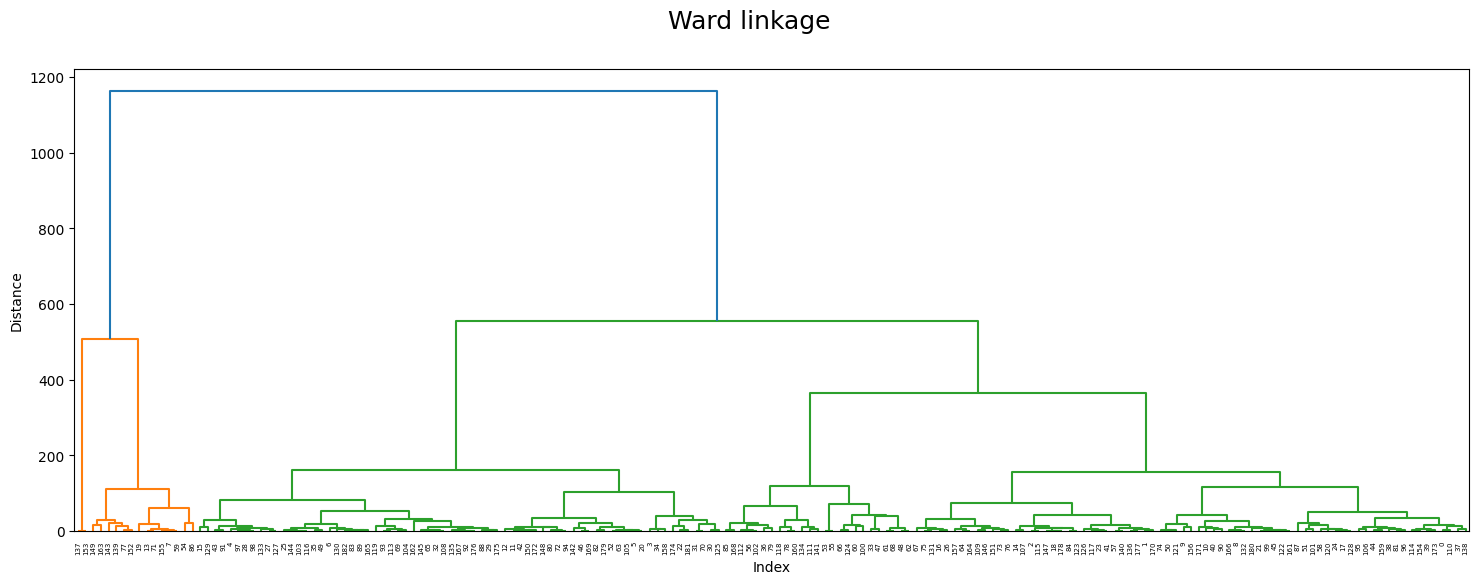

In [18]:
dist_w = linkage(df.loc[:, ["Fare",
                            "Age",
                            "Survived",
                            "Pclass"]], method="ward")
plt.figure(figsize=(18, 6))
dendrogram(dist_w)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Ward linkage", fontsize=18)
plt.show()